In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
# from subprocess import check_output
# from sklearn import tree
# from sklearn.pipeline import make_pipeline
# from sklearn import preprocessing
# from sklearn.model_selection import ShuffleSplit
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('fruits_dataset.data')
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
data.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [4]:
data.value_counts('fruit_name')

fruit_name
apple       19
orange      19
lemon       16
mandarin     5
dtype: int64

[Text(0.5, 1.0, 'Mass and Color Score')]

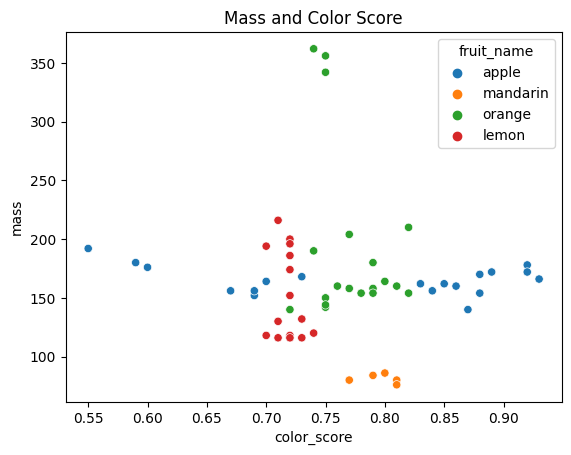

In [5]:
fig1 = sns.scatterplot(x='color_score', y="mass", hue="fruit_name", data=data)
fig1.set(title="Mass and Color Score")

[Text(0.5, 1.0, 'Height and Width score')]

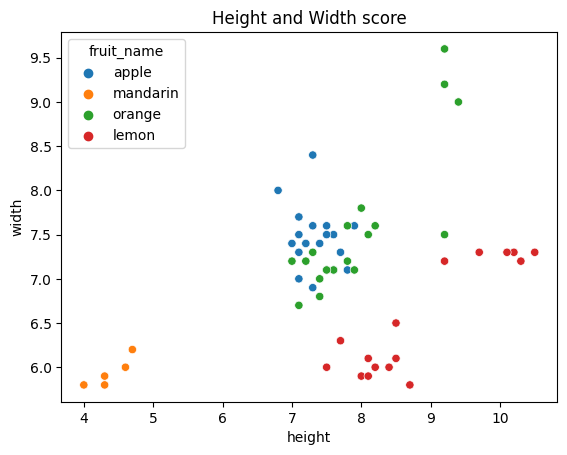

In [6]:
fig1 = sns.scatterplot(x='height', y="width", hue="fruit_name", data=data)
fig1.set(title="Height and Width score")

In [7]:
features = data.iloc[:, 3:]
label = data.iloc[:, 1]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state = 0 )

print("Jumlah data train", x_train.shape[0])
print("Jumlah data test", y_test.shape[0])


Jumlah data train 47
Jumlah data test 12


In [8]:
knn = KNeighborsClassifier(n_neighbors= 5, weights="distance")
knn.fit(x_train, y_train)

train_acc = knn.score(x_train, y_train)
print("The accuracy of KNN classifier on training data is : {:.3f}".format(train_acc))

The accuracy of KNN classifier on training data is : 1.000


In [9]:
knn_test_acc = knn.score(x_test, y_test)

print("The accuracy of KNN classifier on test data is : {:.3f}".format(knn_test_acc))

The accuracy of KNN classifier on test data is : 0.667


Text(0.5, 1.0, 'Confusion Matrix')

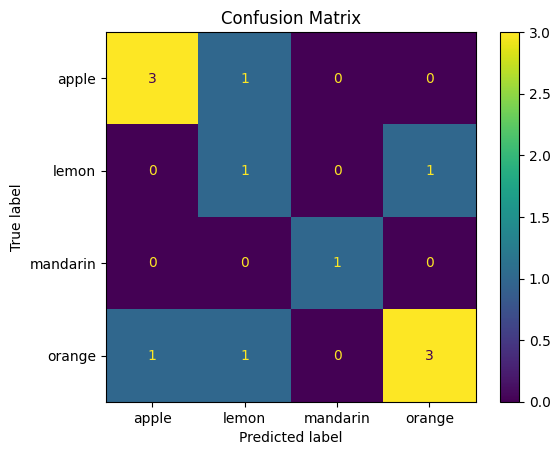

In [10]:
disp = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test)
disp.ax_.set_title("Confusion Matrix")

In [11]:
import pickle
with open('knn_model.pickle', 'rb') as f:
    model = pickle.load(f)

new_data = [80, 5.8, 4.5, 0.77]
x = np.array([new_data])
prediction = model.predict(x)
print("Prediction of Species : {}".format(prediction))

Prediction of Species : ['mandarin']


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
